In [ ]:
# Load all the necessary libraries
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
!git clone https://github.com/Data-Science/Datasets.git
# Load the file
airport=pd.read_csv('./Datasets/airport.csv')

Cloning into 'DATA602Datasets'...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 72 (delta 12), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (72/72), done.


In [ ]:
# View the dataset
print(airport)

    year     dep     arr  dep_dem  ...  caputil  eff_dep  eff_arr   saer
0   2000  172170  158570   215157  ...    46.67    91.93    94.31  93.00
1   2001  147010  133806   176997  ...    42.79    93.41    95.48  94.34
2   2002  142779  129089   169072  ...    41.13    94.81    95.87  95.29
3   2003  140023  126800   168626  ...    41.59    94.26    94.73  94.47
4   2004  161351  160474   203993  ...    50.32    93.22    94.93  94.02
5   2005  176738  176139   249869  ...    54.73    91.55    93.92  92.63
6   2006  191852  191288   326131  ...    57.28    91.98    94.20  92.92
7   2007  222946  222505   407468  ...    62.42    90.42    91.82  91.05
8   2008  221203  221458   352677  ...    60.47    89.35    92.10  90.67
9   2009  209595  209710   312026  ...    57.35    89.91    92.47  91.14
10  2010  200902  200595   277480  ...    58.61    92.05    92.89  92.45
11  2011  205231  204685   266431  ...    56.99    91.84    92.76  92.30
12  2012  202430  202162   254435  ...    54.19    

In [ ]:
airport.dtypes

caputil    float64
dep          int64
dtype: object

### **1) Let's learn what is the data related to and meaning of some the fields/columns?**

We're trying to figure out the relationship between the two columns in the given data, where 'X' is the independent variable and 'Y' is the dependent variable. The general formula for calculating the 'Y' in linear regression is 'y=c+b*x', where c is the constant and b is the regression coefficient. Looking at the data and using further linear regression to predict the outcome, I believe that the column 'caputil' has been increasing in recent years, showing a positive slope with an upward trend, implying that column 'caputil' is something related to flight percentage every year, whereas column 'dep' is the number of flights flown in that particular year.


In [ ]:
# Create a data frame
airport=pd.DataFrame(airport, columns=['caputil', 'dep'])
# Define X and Y
X=pd.DataFrame(airport['caputil'])
Y=pd.DataFrame(airport['dep'])

### **Let's discuss about Linear Regression to understand the data.**


In Linear regression we basically plot all the observation and try to predict a regression line that has a relation with all the plots and we try to find a line that has least square error, that is the difference between actual plots and estimated plots, so by trying to reduce the error we find a model that can predict the plots based on the regression line.



In [ ]:
# Define the model
reg = LinearRegression()

### **2) What's KFold and Cross Validation ? Some general research.**

KFold and cross validation are techniques which are used to validate or compare different machine learning algorithms to get a sense of which model is more accurate for that particular dataset, for example to a certain data K-Nearest neighbors would be more accurate and in the same way for other data SVM would make more sense, so in these type of scenarios we can use cross validation techniques to verify which model would give more accurate output. KFold is a technique where the data is divided into 'K' number of folds where the different folds are divided into training data and testing data so basically we try to evaluate the Machine Learning model, the model uses the training data to learn and whereas as testing data is used to evaluate the performance of the model, the performance for each fold is then considered by taking the mean of each fold, hence by doing this we can use same model to evaluate on different models, the model which gives the best score can be considered.
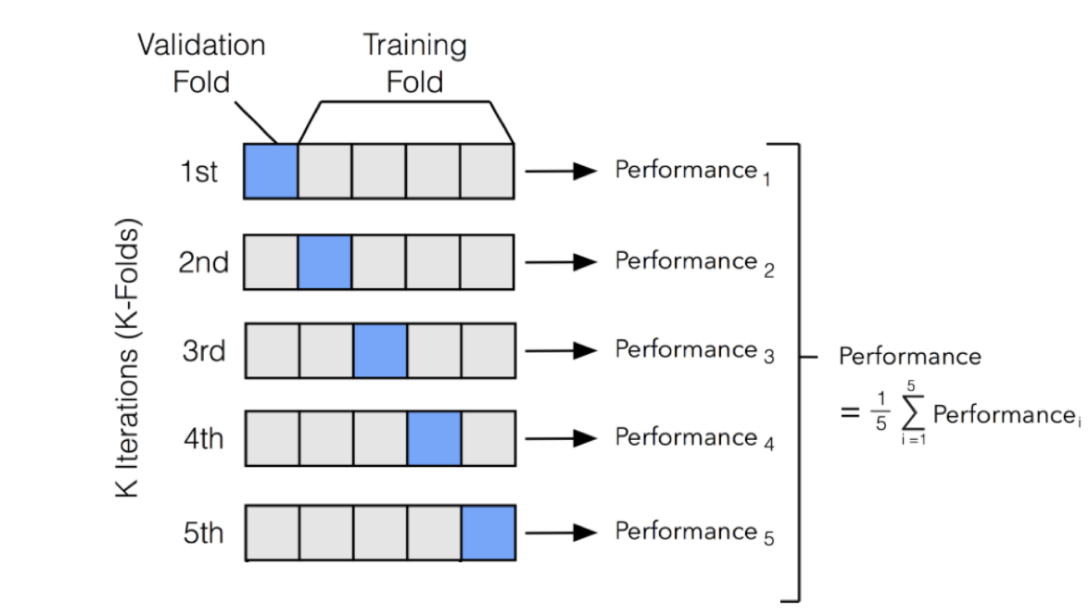


### **3) Difference between using sklearn LinearRegression and the StatsModel.**

The sklearn and stats model are libraries which are used in linear models to calculate prediction. Basically stats model is used often to explore data analysis whereas the sklearn model is used to predict the outcome. Moreover, when various researchers tried to evaluate both models sklearn was slightly faster than statsmodel. Both sklearn and and stats model provide logistic regression however both models provide different output because sklearn regulaizes logistic regression by default whereas stats model has more choices of algorithms tho choose. Stats model is basically used for rigorous statistic, however both models have different roles so in general stats model is best suited for models which require more of EDA whereas sklearn is more suited for models which requires predictive analysis.


### **4) Please refer to the box plots in the notebook. How are box plots and scatter plots useful as visualization tools for exploratort data analysis.**

Scatter plot is basically a visualization model which helps in getting the knowledge of distrubution of data, basically box plot displays data based on five key factors those are Mean, median, Minimum, first quartile and third quartile. Box plot includes two parts one is box and other one is whiskers which divide the box into different quartiles, the lowest point shows the minimum value in the whole data whereas the max value is the highest value in whole data. The quartile is divided with a horizatal line which is the median, it divides the data into two parts where fifty percent of the data is above median and the other fifty is below median. The box itself is called interquartile range which contains fifty percent of the data, however only disadvantage with the boxplots is when there are certain outliers which makes the whole plot irregular, but there are modified boxplots as wellwhich terminates the issue of outliers.

Scatter plots have random points which represent different types of data. Scatter plot allows us to understand the distrubution of data, scatter plots mostly have trends or pattern so based on the trend we can analyze the data, it allows us to understand the relationship between variables, however scatter plot is useful to show relation between two numeric variables and often these variables are correlated.

In [ ]:
# Determine three folds
scores=[]
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

In [ ]:
# Create the iteration for the three folds
for i, (train, test) in enumerate(kfold.split(X, Y)):
    reg.fit(X.iloc[train,:], Y.iloc[train,:])
    score = reg.score(X.iloc[test,:], Y.iloc[test,:])
    scores.append(score)
print(scores)

[0.9029142706220207, 0.9048352664783202, 0.5119143545760048]


#### The coefficient of determination, also known as R<sup>2</sup> score, tells us how well the linear regression model fits the data. It indicates the proportion of the variance in the dependent variable 𝑌 that is predictable from the independent variables 𝑋.

A higher R<sup>2</sup> indicates a better fit, while a lower R<sup>2</sup> suggests the model does not capture the underlying relationships in the data well.

In [ ]:
# Determine the coefficient of determination with sklearn
reg = LinearRegression().fit(X, Y)
print('Coefficient of Determination:', reg.score(X, Y))

Coefficient of Determination: 0.8897612752328165


In [ ]:
# Determine the coefficient for X
print('Coefficients:', reg.coef_)

Coefficients: [[4202.71508638]]


In [ ]:
# Determine the intercept
print('Intercept:', reg.intercept_)

Intercept: [-33354.0929305]


In [ ]:
# Predict the Y values
Y_pred=reg.predict(Y)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- dep
Feature names seen at fit time, yet now missing:
- caputil

  warnings.warn(message, FutureWarning)


In [ ]:
# Determine the values
print('Predicted Values: ',Y_pred)

Predicted Values:  [[7.23548102e+08]
 [6.17807791e+08]
 [6.00026103e+08]
 [5.88443420e+08]
 [6.78078928e+08]
 [7.42746105e+08]
 [8.06265941e+08]
 [9.36945164e+08]
 [9.29619831e+08]
 [8.80834714e+08]
 [8.44300512e+08]
 [8.62494066e+08]
 [8.50722261e+08]
 [8.56471575e+08]
 [8.95619866e+08]
 [9.25076696e+08]
 [9.49734026e+08]
 [9.37701652e+08]
 [9.55769124e+08]]


In [ ]:
# Visualize predicted errors
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(reg, X, Y, cv=10)

In [ ]:
# Determine the predicted errors
print('Predicted Errors: ', predicted)

Predicted Errors:  [[160835.55508042]
 [143928.21704009]
 [138393.80845549]
 [140358.20860634]
 [180662.82450213]
 [198806.56295092]
 [209181.70395083]
 [231558.86084681]
 [220561.15973044]
 [207488.73277439]
 [214087.71393934]
 [207154.97715331]
 [193506.03241906]
 [195900.52219425]
 [204795.19251424]
 [215536.69965656]
 [210137.99688364]
 [214613.01298902]
 [216056.74708452]]


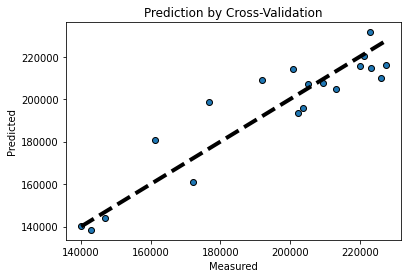

In [ ]:
# Create a graph of the predicted versus cross-validated errors
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
ax.scatter(Y, predicted, edgecolors=(0, 0, 0))
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Prediction by Cross-Validation', fontdict=None, loc='center', pad=None)
plt.show()

In [ ]:
# Method 2 Using Statsmodels
import statsmodels.api as sm
from scipy import stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Add a constant
X2 = sm.add_constant(X)
# Define the model
est = sm.OLS(Y, X2)
# Fit the model
est2 = est.fit()
print("summary()\n",est2.summary())
print("pvalues\n",est2.pvalues)
print("tvalues\n",est2.tvalues)
print("rsquared\n",est2.rsquared)
print("rsquared_adj\n",est2.rsquared_adj)

summary()
                             OLS Regression Results                            
Dep. Variable:                    dep   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     137.2
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           1.45e-09
Time:                        19:24:27   Log-Likelihood:                -201.11
No. Observations:                  19   AIC:                             406.2
Df Residuals:                      17   BIC:                             408.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.335e+04   1.96e+04     -1.6

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


In [ ]:
# Determine predicted values and R-squared with scikitlearn
from sklearn.metrics import r2_score
predictions = est2.predict(X2)

print(est2.predict(X2))

print("r2_score",r2_score(Y,predictions))

0     162786.620151
1     146480.085616
2     139503.578572
3     141436.827512
4     178126.530216
5     196660.503747
6     207377.427217
7     228979.382761
8     220784.088343
9     207671.617273
10    212967.038282
11    206158.639842
12    194391.037600
13    196786.585199
14    205612.286881
15    216497.318955
16    211958.386661
17    216581.373256
18    217043.671916
dtype: float64
r2_score 0.8897612752328166
